# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [2]:
# Your code here. 
student_data = pd.DataFrame({'X': [17,51,27,21,36,48,19,26,54,30], 'Y': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

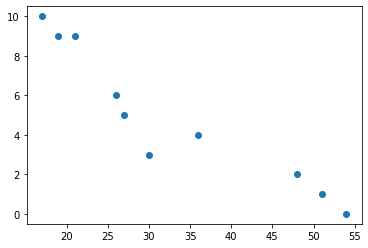

In [3]:
# Your code here.
X = student_data['X']
Y = student_data['Y']
plt.scatter(X,Y)

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
#paolo:  what relashionship do you see?

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
X.corr(Y)
np.cov(X,Y)

array([[187.65555556, -45.56666667],
       [-45.56666667,  12.54444444]])

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [6]:
# Your response here.
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print('The slope is, b1: ' + str(slope))
print('The intercept is, b0: ' + str(intercept))

x = sm.add_constant(X)
model = sm.OLS(Y,x)
results = model.fit()
predictions = results.predict(x)
compare = pd.DataFrame({'Age': X, 'Actual':Y, 'predicted':predictions})
compare.head(10)
#Outcome variable is tardies
#Simple linear regression as we make value predictions and only one independent variable is used to predict the outcome variable.

The slope is, b1: -0.24282077091598084
The intercept is, b0: 12.88880336313577


,Age,Actual,predicted
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


Plot your regression model on your scatter plot.

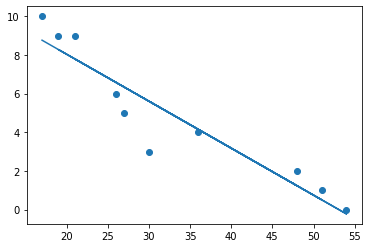

In [7]:
# Your code here.
plt.scatter(X,Y)
plt.plot(X, predictions)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [8]:
# Your response here. 
from sklearn.metrics import r2_score
print('The r-squared score of our model is:', r2_score(Y, predictions))
"""The r-squared score of the model is high, the model indicates that age is a good predictor of tardiness."""
#paolo: yes! great to plot model + data on the same plot it gives you a lot of insight

The r-squared score of our model is: 0.8820265558250109


'The r-squared score of the model is high, the model indicates that age is a good predictor of tardiness.'

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [9]:
# Import any libraries you may need 

In [10]:
# Import the data
df = pd.read_csv('../data/vehicles.csv')
df.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [11]:
# Your response here.
print(df.corr()['CO2 Emission Grams/Mile'].sort_values(ascending=False).head(10))

"""FuelBarrelsYear and Fuel Cost/Year strongly positivelt correlate, and Highway MPG, Combined MPG and City MPG strongly negatively correlate. Other variables also have a medium to strong corrrelation. The weakest correlation is between Year and CO2 Emissions Grams/Mile"""

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Engine Displacement        0.803520
Cylinders                  0.752393
Year                      -0.222300
City MPG                  -0.894139
Combined MPG              -0.926229
Highway MPG               -0.926405
Name: CO2 Emission Grams/Mile, dtype: float64


'FuelBarrelsYear and Fuel Cost/Year strongly positivelt correlate, and Highway MPG, Combined MPG and City MPG strongly negatively correlate. Other variables also have a medium to strong corrrelation. The weakest correlation is between Year and CO2 Emissions Grams/Mile'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [12]:
# Your response here. 
X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year']]
Y = df['CO2 Emission Grams/Mile']

# Build
model = sm.OLS(Y,X)
# Fit
results = model.fit()  ## -> SSE/OLS Procedure 
# Predict
predictions = results.predict(X)

print(results.summary())

"""The multivariate linear regression model is used to model the data since multiple variables highly correlate to CO2 Emissions Grams/Mile that thus may help in this model. """

                                   OLS Regression Results                                   
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Mon, 09 Nov 2020   Prob (F-statistic):                        0.00
Time:                             17:01:16   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
                        coef    std err          t      P>|t|      [0.

'The multivariate linear regression model is used to model the data since multiple variables highly correlate to CO2 Emissions Grams/Mile that thus may help in this model. '

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [13]:
# Your response here. 
print(pd.DataFrame({'Actual':Y, 'predicted':predictions}))
print('The r-squared score of our model is:', r2_score(Y, predictions))
""" The r-squared score is close to 1, hence we can be confident that the model predicts values accurately. However, we must note that the condition number is very high and multicollinearity may distort the accuracy of this model. This means that some of the variables correlate strongly together. """
""" From the summary we also read that Fuel/Barrels/Year and Combined MPG have the highest coefficients, this means they are important in the regression model, important variables to estimate the CO2 Emission Grams/Mile"""

           Actual   predicted
0      522.764706  518.638632
1      683.615385  668.608594
2      555.437500  550.196992
3      683.615385  668.671588
4      555.437500  565.236341
...           ...         ...
35947  244.000000  233.579134
35948  243.000000  233.642128
35949  244.000000  233.705122
35950  246.000000  233.768116
35951  255.000000  243.473803

[35952 rows x 2 columns]
The r-squared score of our model is: 0.9800347984321203


' From the summary we also read that Fuel/Barrels/Year and Combined MPG have the highest coefficients, this means they are important in the regression model, important variables to estimate the CO2 Emission Grams/Mile'

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [14]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [15]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [16]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [17]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [18]:
# Your response here. 